In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten
import seaborn as sns

In [3]:
df = pd.read_csv("ifood_df.csv")

### Data Exploration and Cleaning

In [4]:
df.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2155,65487.0,0,0,48,240,67,500,199,0,163,...,1,0,0,0,0,1,0,1006,843,0
659,36145.0,1,0,13,56,4,76,17,1,18,...,0,0,1,0,0,0,0,154,136,1
608,84196.0,0,1,56,215,63,507,231,31,190,...,0,0,0,0,1,0,0,1047,857,0
1362,26907.0,1,1,10,9,1,7,0,3,2,...,1,0,1,0,0,0,0,20,18,0
2039,77610.0,0,1,70,1245,33,332,21,33,16,...,0,0,0,0,0,0,1,1664,1648,0


In [5]:
df.isna().sum()
# no null values

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

Since MntTotal is the column I will be focusing on so it needs to be cleaned and all outliers needs to be remove to prevent disturbance. While performimg certain calculations

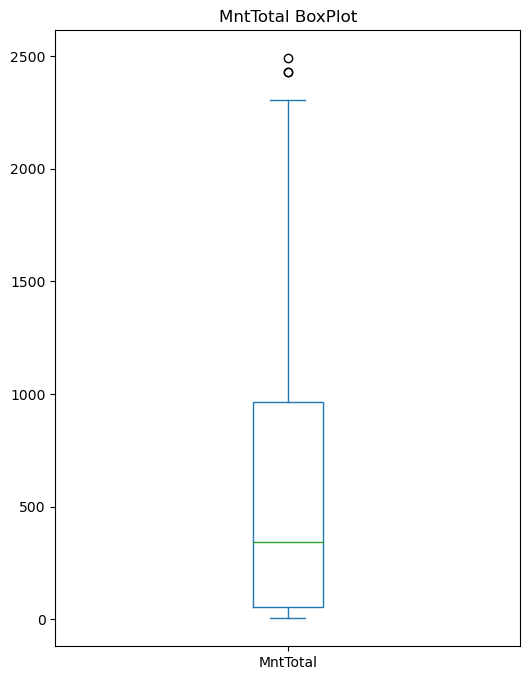

In [9]:
df["MntTotal"].plot(kind ="box" , figsize = (6,8) ,title = "MntTotal BoxPlot")
plt.show()

The box plot shows the presence of two outliers

In [10]:
# cleaning the outliers
Q1 = df["MntTotal"].quantile(0.25)
Q3 =  df["MntTotal"].quantile(0.75)
IQR = Q3-Q1

df = df[(df["MntTotal"] >= Q1 - 1.5 * IQR) & (df["MntTotal"] <= Q3 + 1.5 *IQR)]


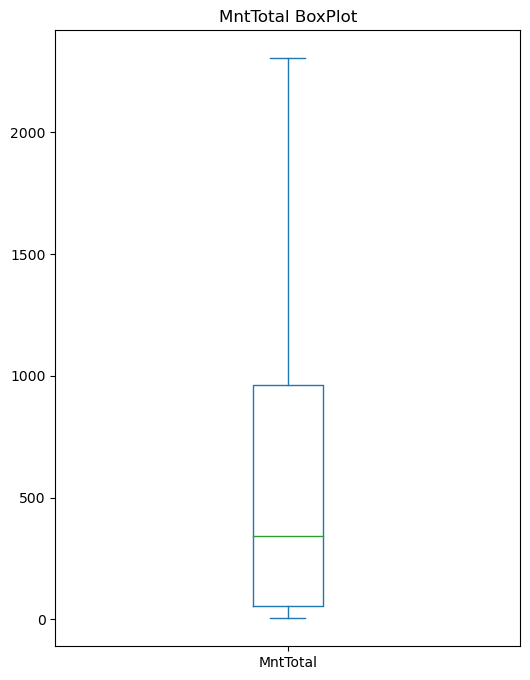

In [11]:
df["MntTotal"].plot(kind ="box" , figsize = (6,8) ,title = "MntTotal BoxPlot")
plt.show()
#Outliers have been removed

### Descriptive Statistics

Calculating the average MntTotal

In [12]:
Sum_MntTotal = df["MntTotal"].sum() #total amount spent of all customers

Num_MntTotal = df["MntTotal"].shape[0] #number of transacgtions

Avg_MntTotal = Sum_MntTotal/Num_MntTotal

Avg_MntTotal

560.19391462307

Purchase Frequency

In [13]:
Num_customers = df.shape[0]

frequency = Num_MntTotal / Num_customers
frequency

1.0

In [14]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


The table above shows the mean (Average) , std , mian and max of each column and is proper to describe the dataset

### Customer segmentation

Firstly, making use of the elbow plot the find the amount of cliusters to be used

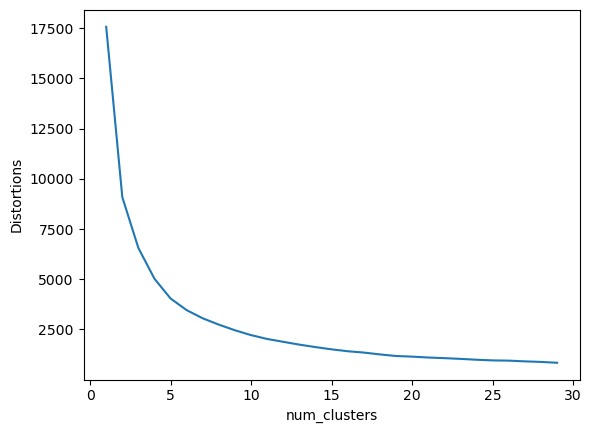

In [28]:
# The columns taken into consideration.
Features = ['Income', 'Recency', 'MntWines', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Age', 'MntTotal']

Distortions = []
clusters = range(1,30)


for i in clusters:
    centroids, distortion = kmeans(df[Features], i)
    Distortions.append(distortion)
    
elbow_plot = pd.DataFrame({'num_clusters': list(clusters),
                           'Distortions' : Distortions})

sns.lineplot(x='num_clusters', y = 'Distortions', data= elbow_plot)
plt.show()



The distortion drops steeply from clusters 2 to around 5–6.
After k = 6, the curve flattens out — additional clusters reduce distortion only slightly.
so we will be makind use of 6

Secondly , After finding the appropriate number for the clusters , i use it to create the cluster points and labels using kmeans and vq.

In [29]:
centroids, distortion = kmeans(df[Features], 6)

df['cluster_labels'], _ = vq(df[Features], centroids)


### Visualizations

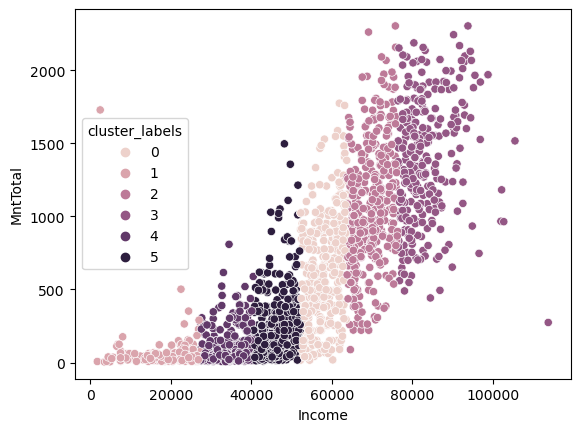

In [30]:
sns.scatterplot( x = 'Income' , y = 'MntTotal', hue = 'cluster_labels' , data = df )
plt.show()

Text(0, 0.5, 'MntTotal')

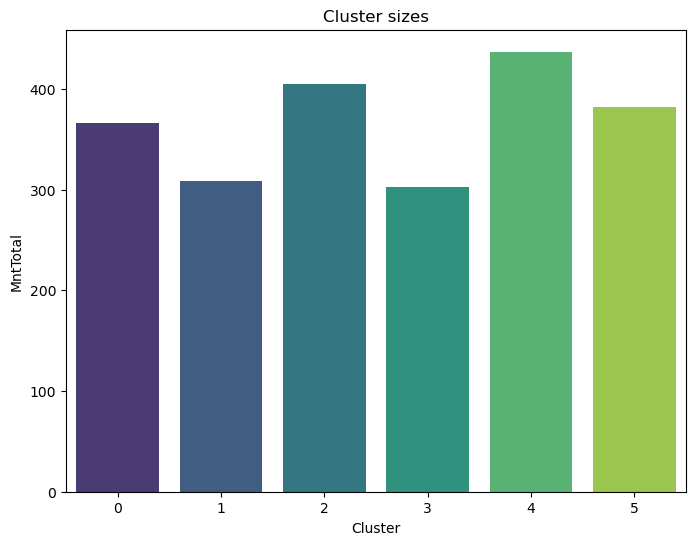

In [31]:
cluster_sizes = df.groupby('cluster_labels')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='cluster_labels', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

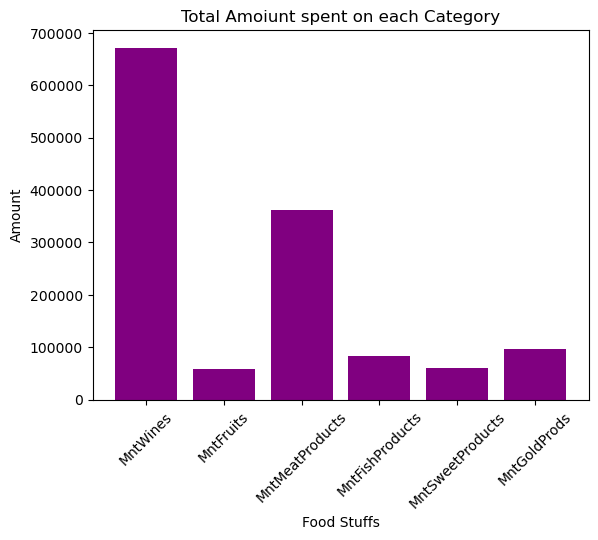

In [32]:
food_stuff = ["MntWines" ,"MntFruits" ,"MntMeatProducts", "MntFishProducts","MntSweetProducts","MntGoldProds"]  
category_totals = df[food_stuff].sum()
fig, ax = plt.subplots()
ax.bar(category_totals.index, category_totals.values, color ="purple")
ax.set_xlabel("Food Stuffs")
ax.set_ylabel("Amount")
ax.set_title("Total Amoiunt spent on each Category")
plt.xticks(rotation = 45)
plt.show()

<Figure size 1000x600 with 0 Axes>

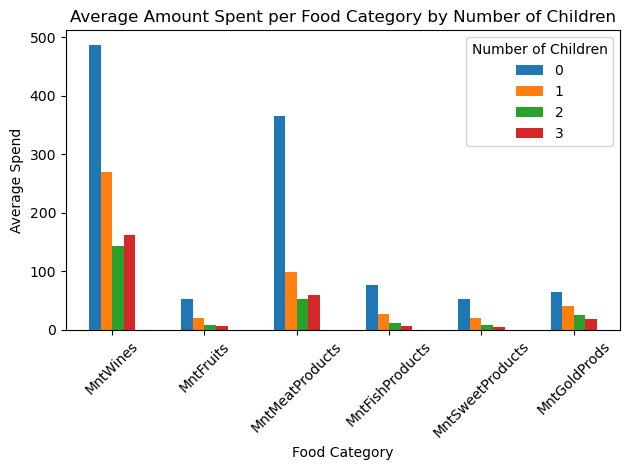

In [33]:
food_stuff = ["MntWines", "MntFruits", "MntMeatProducts", 
              "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Calculate total number of children
df['NumChildren'] = df['Kidhome'] + df['Teenhome']

# Group by number of children and compute mean for each food category
grouped = df.groupby('NumChildren')[food_stuff].mean().T  # Transpose so categories are on x-axis

# Plot
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')

plt.title("Average Amount Spent per Food Category by Number of Children")
plt.xlabel("Food Category")
plt.ylabel("Average Spend")
plt.xticks(rotation=45)
plt.legend(title="Number of Children")
plt.tight_layout()
plt.show()

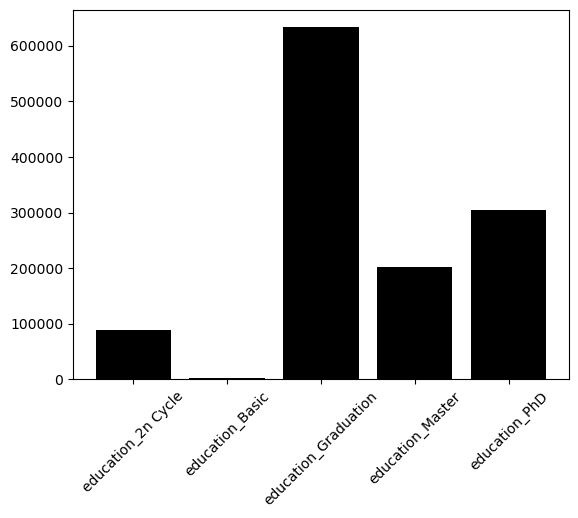

In [34]:
Education = ["education_2n Cycle","education_Basic","education_Graduation","education_Master","education_PhD"]
Amount_spent =[]
for i in Education:
    df_clean = df[df[i] == 1]
    Amount_spent.append(df_clean["MntTotal"].sum())
                        
Edu_df= pd.DataFrame({"Education":Education,
                      "Amount_spent": Amount_spent})

fig, ax = plt.subplots()
ax.bar( Edu_df["Education"],Edu_df["Amount_spent"], color = "black")
plt.xticks(rotation = 45 )
plt.show()

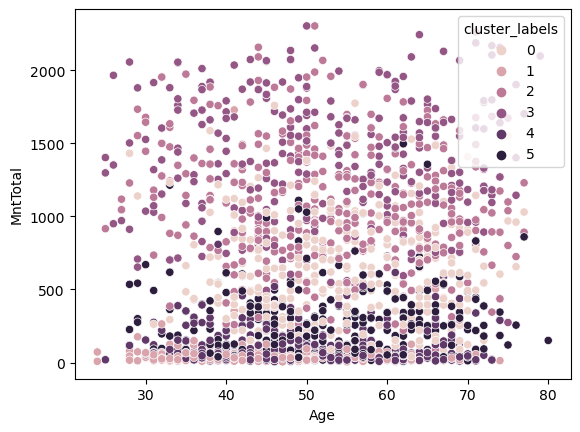

In [35]:
sns.scatterplot( x = 'Age' , y = 'MntTotal', hue = 'cluster_labels' , data = df )
plt.show()

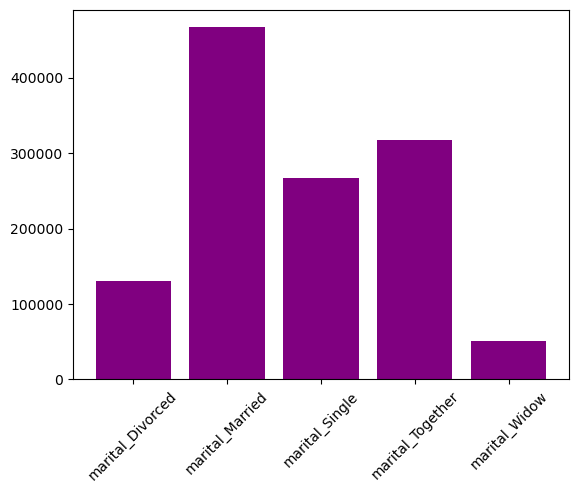

In [40]:
marital_state = 'marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow'
Amount_spent = []
for m in marital_state:
    df_m = df[df[m] == 1]
    Amount_spent.append(df_m["MntTotal"].sum())
    
marital = pd.DataFrame({"marital_state" : marital_state,
                        "Amount_spent" : Amount_spent})
fig, ax = plt.subplots()
ax.bar( marital["marital_state"],marital["Amount_spent"], color = "purple")
plt.xticks(rotation = 45 )
plt.show()

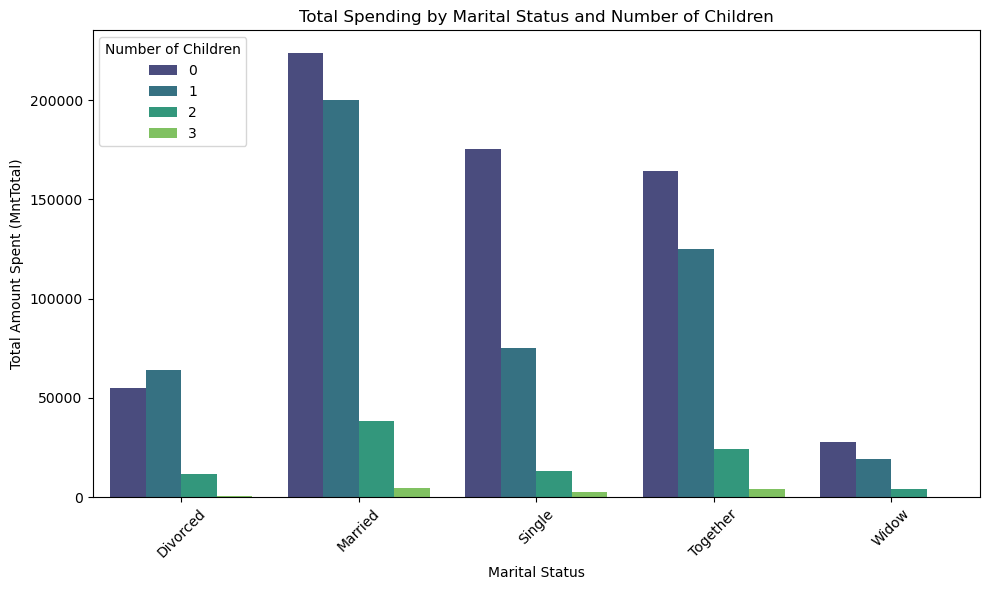

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convert one-hot marital columns back to a single column
marital_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
df_long = df.copy()

# Create a single 'MaritalStatus' column from one-hot columns
df_long['MaritalStatus'] = df_long[marital_cols].idxmax(axis=1).str.replace("marital_", "")

# 2. Group by MaritalStatus and NumChildren, sum spending
grouped = df_long.groupby(['MaritalStatus', 'NumChildren'])['MntTotal'].sum().reset_index()

# 3. Plot a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='MaritalStatus', y='MntTotal', hue='NumChildren', palette='viridis')

plt.title("Total Spending by Marital Status and Number of Children")
plt.xlabel("Marital Status")
plt.ylabel("Total Amount Spent (MntTotal)")
plt.legend(title="Number of Children")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights and Recommendation

#### Marital Status
##### Insights
1. People with Children thens to spend less money which can be die to oreder expenses such as School fees, extra classes e.t.c
2. Widows spend less money which is quit understandable
3. Those who are married spend the most and has the most amount of children
4. Wine is the product which most money is spent on

##### Recommendations
1. Bring in more quality wine because it will be of interest
2. Coupons should be available for does in need and Disounts also. For it will increse the amount spent by widows and help them.
3. 

#### Food Stuffs
##### Insights
1. Wines  is the product with the most amount of sales.
2. Fish has a very low sales compared to meat
3. Fruits have low sales as well
4. The most amount gotten from customers are thise with no kids
5. The increase in kids shows less amount spent.
##### Recommendations
1. Putting a discount in the Fish and Fruits Product to increase sales
2. Checking fruits if they are fresh cuase that can be a cause
3. Putting discounts on lowly bought products